In [1]:
import numpy as np
import matplotlib.pyplot as plt
import agents_enviroments

In [2]:
bays = [agents_enviroments.Bay() for _ in range(6)]
params = agents_enviroments.Parameters(C=0.05 ,V=1, m=0.67, k=0.4,treatment_prob=0.7,isolation_prob=0.1)
ward = agents_enviroments.Ward(bays,params=params)

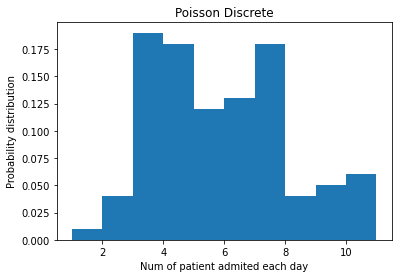

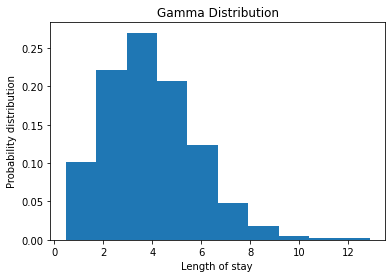

In [3]:
patient_generator = agents_enviroments.PatientGenerator()
patient_generator.set_var(poisson_lambda=5,gamma_k=4,gamma_scale=1)
patient_sequence = patient_generator.generate_sequence(colonized_prob=0,time=100)
patient_generator.show_admit()
patient_generator.show_length_stay()

In [4]:
history = agents_enviroments.History() 

for patients in patient_sequence:
    ward.remove_patients()
    ward.admit_patients(patients=patients)
    history.add_from_dict(ward.history_dict())
    ward.forward_time()

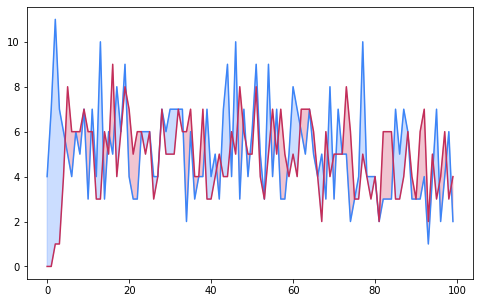

In [5]:
BLUE = "#3D85F7"
BLUE_LIGHT = "#5490FF"
PINK = "#C32E5A"
PINK_LIGHT = "#D34068"

fig, ax = plt.subplots(figsize=(8, 5))

# Add lines
ax.plot(history.time, history.new_patients, color=BLUE)
ax.plot(history.time, history.removed, color=PINK)

# Add fill between the two lines.
# Two `fill_between` calls are needed to have two different colors.
# First, a fill when CAT is larger than NOT_CAT
ax.fill_between(
    history.time, history.new_patients, history.removed, where=(history.new_patients > history.removed), 
    interpolate=True, color=BLUE_LIGHT, alpha=0.3
)

# Then, a fill when CAT is not larger than NOT_CAT
ax.fill_between(
    history.time, history.new_patients, history.removed, where=(
        history.new_patients <= history.removed),
    interpolate=True, color=PINK_LIGHT, alpha=0.3
)

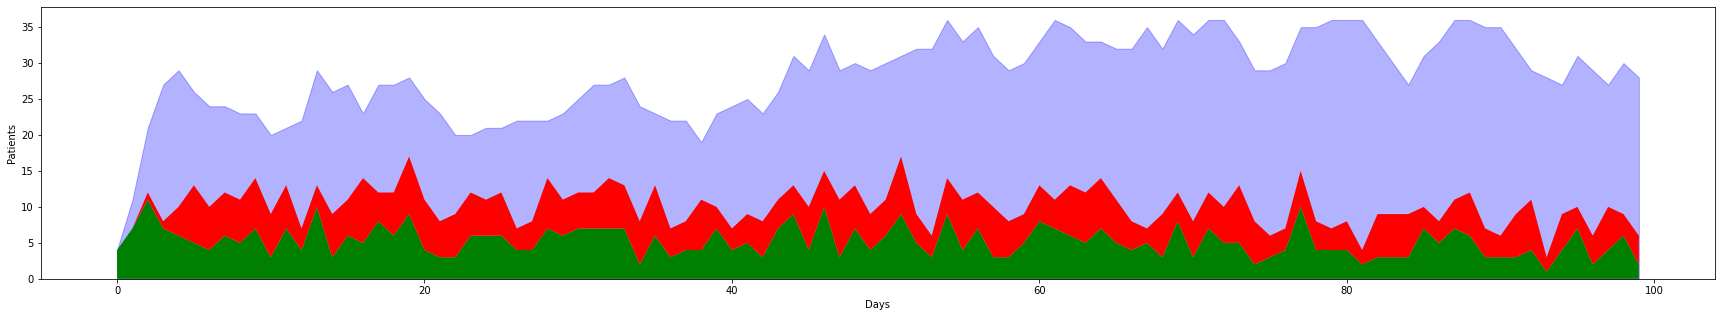

In [6]:
plt.figure(figsize=(30,5))
plt.fill_between(history.time,history.total,color='blue',alpha=0.3)
plt.stackplot(history.time,history.new_patients,history.removed,labels=["Admited","Discharged"],colors=["g","r"])
plt.xlabel("Days")
plt.ylabel("Patients")
plt.show()

In [7]:
history.removed.mean()
history.new_patients.mean()


5.2

(array([ 2.,  2.,  3., 14., 19., 19., 23., 12.,  5.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

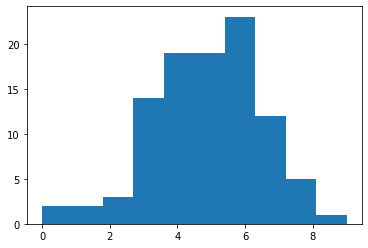

In [8]:
plt.hist(history.removed,bins=10)


(array([ 1.,  5., 19., 20., 12., 13., 19.,  3.,  4.,  4.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

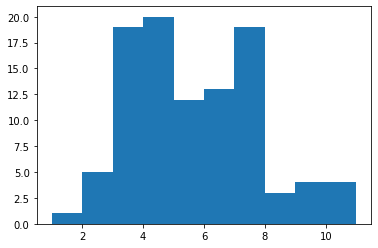

In [9]:
plt.hist(history.new_patients,bins=10)